# **ARIMA Models in Python**
James Fulton - Climate Informatics researcher

## ARMA Models

### Intro to time series and stationarity

Motivation

Time series are everywhere (knowing the future we can change it now)
- Science
- Technology
- Business
- Finance
- Policy

Course content

You will learn
- Structure of ARIMA models
- How to to fit ARIMA model
- How to optimize the model
- How to make forecasts
- How to calculate uncertainty in predictions

In [ ]:
# Loading and plotting

import pandas as pd
import matplotlib as plt
df = pd.read_csv('time_series.csv', index_col='date', parse_dates=True)

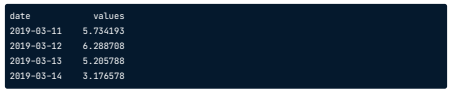

Trend
- increase
- negative

In [ ]:
fig, ax = plt.subplots()
df.plot(ax=ax)
plt.show()

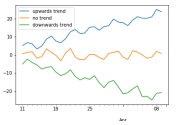

Seasonality
- Repeat at regular intervals

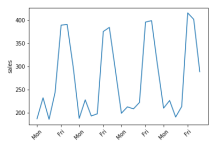

Cyclicality
- Repeat but without fixed period

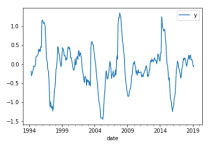

White noise

White noise series has uncorrelated values
- Heads, heads, heads, tails, heads, tails, ...
- 0.1, -0.3, 0.8, 0.4, -0.5, 0.9, ...

Stationarity

- must be stationary
- distribution of data does not change with time
- three criterias (figures in order)
    - Trend stationary: Trend is zero
    - Variance is constant
    - Autocorrelation is constant (with previous values)

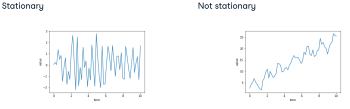

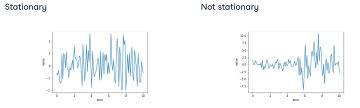

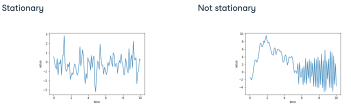

Train-test split
- Split the data in time

In [ ]:
# Train data - all data up to the end of 2018
df_train = df.loc[:'2018']

# Test data - all data from 2019 onwards
df_test = df.loc['2019':]

In [ ]:
# Example
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

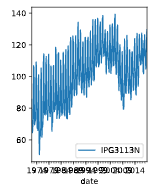

In [ ]:
#Example 2
# Split the data into a train and test set
candy_train = candy.loc[:"2006"]
candy_test = candy.loc["2007":]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

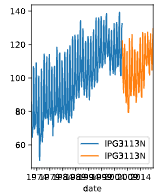

### Making time series stationarity

Overview
- Statistical tests for stationarity
- Making a dataset stationary

The augmented Dicky-Fuller test
- Tests for trend non-stationarity
- Null hypothesis is time series is non-stationary (due to trend)

Applying the adfuller test

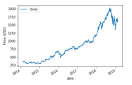

In [ ]:
#import and use the function
from statsmodels.tsa.stattools import adfuller
results = adfuller(df['close'])

Interpreting the test result

In [ ]:
print(results) #tuple

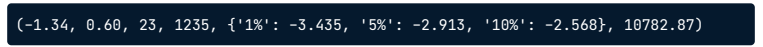

- 0th element is test statistic (-1.34)
    - More negative means more likely to be stationary
- 1st element is p-value: (0.60)
    - If p-value is small → reject null hypothesis. Reject non-stationary.
- 4th element is the critical test statistics
    - brings the value of the test statistc so it could be representative, with 5% of p-value. Therefore, for the 5%, it should be below -2.913

As -1.34 is not representative, the null hypothesis is accepted, and the serie is not stationary

https://www.statsmodels.org/dev/generated/statsmodels.tsa.staools.adfuller.html

The value of plotting
- Plotting time series can stop you making wrong assumptions

ps: always plot, not use only the test

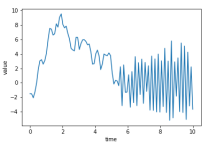

The figure above passes the dicky fuller test

Making a time series stationary (like feature engineering)

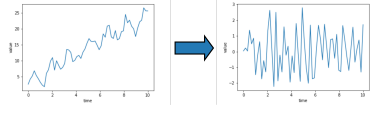

Taking the difference

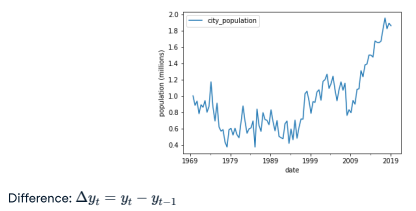

In [ ]:
df_stationary = df.diff() #from pandas #obtain the whole difference

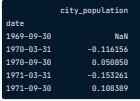

In [ ]:
df_stationary = df.diff().dropna()

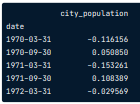

Taking the difference is enough to make it stationary

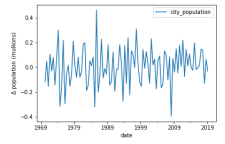

Other transforms

Examples of other transforms
- Take the log
    - np.log(df)
- Take the square root
    - np.sqrt(df)
- Take the proportional change
    - df.shift(1)/df
    
Often, the simple, the better

In [ ]:
#Example

# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake["earthquakes_per_year"])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

In [ ]:
#Example
# Run the ADF test on the time series
result = adfuller(city["city_population"])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

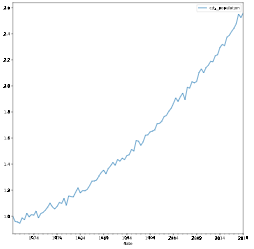

In [ ]:
#Example
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0]) #much lower than the previous
print('p-value:', result[1]) #much higher than the previous

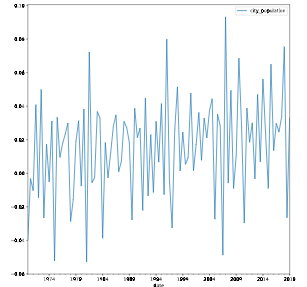

In [ ]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0]) #even lower
print('p-value:', result[1]) #even higher

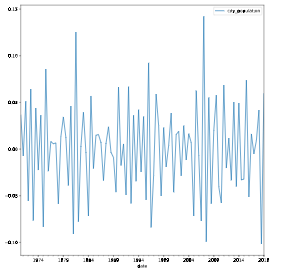

In [ ]:
#example
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

Para o exemplo de baixo

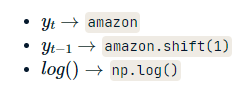

In [ ]:
#Example

# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon)
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

### Intro to AR, MA and ARMA models

AR models
- Autoregressive (AR) model (agains previous values)
- AR(1) model :
- shock term is the noise, or residuals

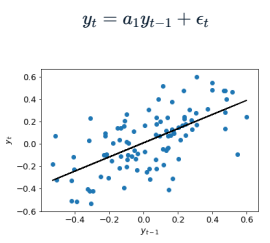

AR models
- Autoregressive (AR) model

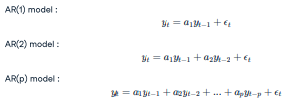

MA models

- Moving average (MA) model

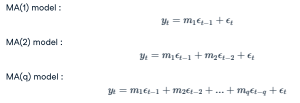

ARMA models
- Autoregressive moving-average (ARMA) model

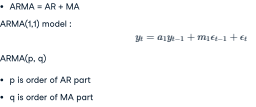

Creating ARMA data

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1, -0.5] #the one is the zero-like term, and will always be set to one. must be negative
ma_coefs = [1, 0.2]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5) #scale is the standard deviation of the shocks

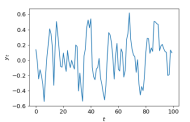

In [ ]:
from statsmodels.tsa.arima_model import ARMA
# Instantiate model object
model = ARMA(y, order=(1,1))
# Fit model
results = model.fit()

In [ ]:
#Example (MA1)
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [ ]:
#Example
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [ ]:
#Example
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

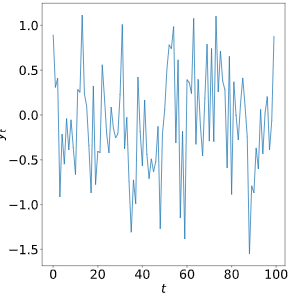

In [ ]:
#Example
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()

## Fitting the Future

### Fitting time series models

Creating a model


In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(timeseries, order=(p,q)) #p is the AR and q the MA

Creating AR and MA models

In [ ]:
ar_model = ARMA(timeseries, order=(p,0))
ma_model = ARMA(timeseries, order=(0,q))

Fitting the model and fit summary

In [ ]:
model = ARMA(timeseries, order=(2,1))
results = model.fit()
print(results.summary())

Fit summary

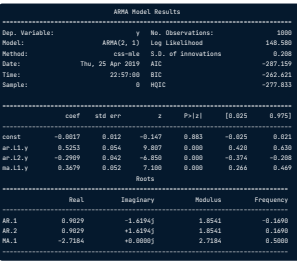

Top section: order, observations and data points and time series. S.D is standard deviations of the shock terms

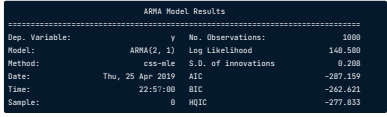

Fit model parameters: arma two one model. two AR coeficients. Represents the coeficient value, the standard value etc

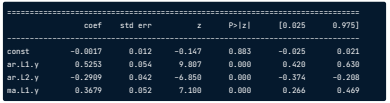

Introduction to ARMAX models
- Exogenous ARMA (model the time series with other variables)
- Use external variables as well as time series
- ARMAX = ARMA + linear regression (combination of both)

ARMAX equation (add one extra term, the independent $z_{t}$ and its coeficient $x_{t}$

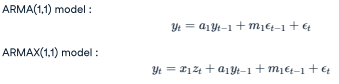

ARMAX example (productivity and hours of sleep (exogenous variable)

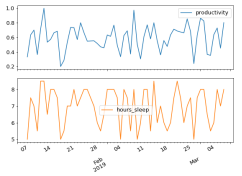

Fitting ARMAX

In [ ]:
# Instantiate the model
model = ARMA(df['productivity'], order=(2,1),
             exog=df['hours_sleep']) #the same, excepct for exog
# Fit the model
results = model.fit()

ARMAX summary (x1 is the exogenous variable)

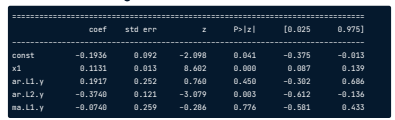

In [ ]:
#Example AR
# Instantiate the model
model = ARMA(sample["timeseries_1"], order=(2,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

#OBS: the input of the coefficients has different signal of the original one

#Example MA
# Instantiate the model
model = ARMA(sample["timeseries_2"], order=(0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

In [ ]:
#Example 2
# Instantiate the model
model = ARMA(earthquake, order = (3,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

In [ ]:
#Example
# Instantiate the model
model = ARMA(hospital["wait_times_hrs"], order = (2,1), exog = hospital["nurse_count"])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

### Forecasting

Predicting the next value

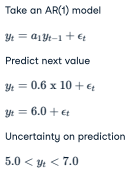

One-step-ahead predictions (the forecast area are the shock terms, that we can not predict)

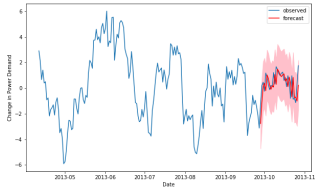

Statsmodels SARIMAX class (has everything that ARMA has, but more. There is an additional model order)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(df, order=(p,0,q))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# An ARMA(p,q) + constant model
model = SARIMAX(df, order=(p,0,q), trend='c') #use it in case it does not center in zero

Making one-step-ahead predictions

In [ ]:
# Make predictions for last 25 values
results = model.fit()
# Make in-sample prediction
forecast = results.get_prediction(start=-25) #prediction to the last 25 entrys of the training data
# forecast mean
mean_forecast = forecast.predicted_mean

Predicted mean is a pandas series

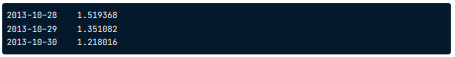

Confidence intervals

In [ ]:
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

Condence interval method returns pandas DataFrame

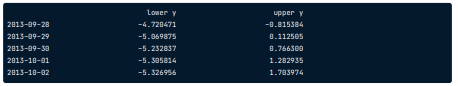

Plotting predictions

In [ ]:
plt.figure()
# Plot prediction
plt.plot(dates, mean_forecast.values, color='red', label='forecast')
# Shade uncertainty area
plt.fill_between(dates, lower_limits, upper_limits, color='pink')
plt.show()

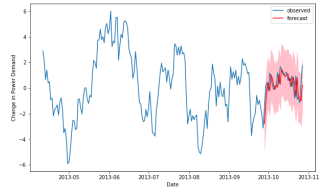

Dynamic predictions (high uncertainty, do not know shock terms - they are used to predict the future where you have no data available)

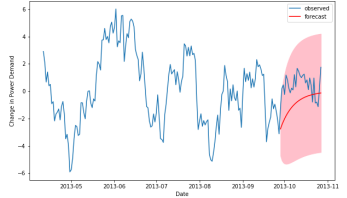

Making dynamic predictions

In [ ]:
results = model.fit()
forecast = results.get_prediction(start=-25, dynamic=True)
# forecast mean
mean_forecast = forecast.predicted_mean
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

Forecasting out of sample (up to 20)

In [ ]:
forecast = results.get_forecast(steps=20)
# forecast mean
mean_forecast = forecast.predicted_mean
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

Forecasting out of sample

In [ ]:
forecast = results.get_forecast(steps=20)

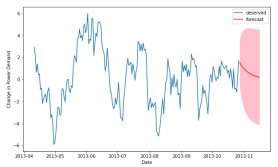

In [ ]:
#Example
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

In [ ]:
#Example
# plot the amazon data
plt.plot(amazon.index, amazon.close, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

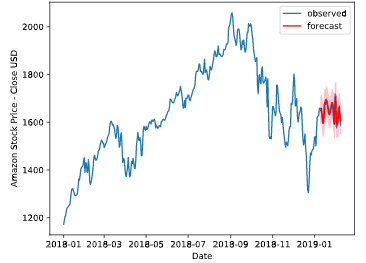

In [ ]:
#Example
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

In [ ]:
#Example
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(upper_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

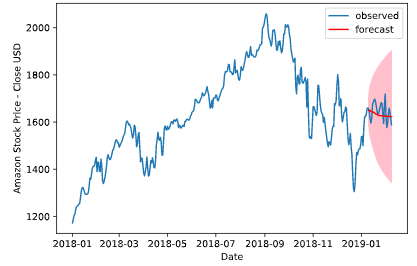

### Intro to ARIMA models

Non-stationary time series recap (can not apply ARMA - must be stationary)

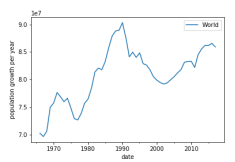

Non-stationary time series recap

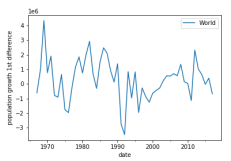

Forecast of differenced time series (can predict, but it is the difference of the time series. however, we want the actual value of the time series)

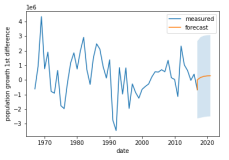

Reconstructing original time series after differencing
- use cumsum/integral to get the whole value, not the difference

In [ ]:
diff_forecast = results.get_forecast(steps=10).predicted_mean
from numpy import cumsum
mean_forecast = cumsum(diff_forecast)

In [ ]:
diff_forecast = results.get_forecast(steps=10).predicted_mean
from numpy import cumsum
mean_forecast = cumsum(diff_forecast) + df.iloc[-1,0] #last value of the original time series to the value

In [ ]:
diff_forecast = results.get_forecast(steps=10).predicted_mean
from numpy import cumsum
mean_forecast = cumsum(diff_forecast) + df.iloc[-1,0]

Reconstructing original time series after differencing

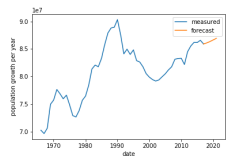

The ARIMA model
- Take the dierence
- Fit ARMA model
- Integrate forecast

Can we avoid doing so much work?
- Yes!
- ARIMA - Autoregressive Integrated Moving Average

Using the ARIMA model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df, order =(p,d,q))

- p - number of autoregressive lags
- d - order of differencing
- q - number of moving average lags
- ARIMA(p, 0, q) = ARMA(p, q)

In [ ]:
# Create model
model = SARIMAX(df, order=(2,1,1)) #differentiate just once. Must do this only to stationary
# Fit model
model.fit()
# Make forecast
mean_forecast = results.get_forecast(steps=10).predicted_mean

In [ ]:
# Make forecast
mean_forecast = results.get_forecast(steps=steps).predicted_mean

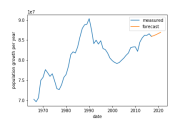

Picking the difference order (test tell us the difference order)

In [ ]:
adf = adfuller(df.iloc[:,0]) #normal one
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])

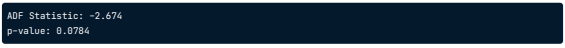

In [ ]:
df = adfuller(df.diff().dropna().iloc[:,0]) #first difference
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])

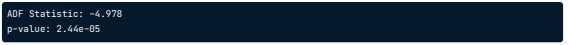

Picking the difference order

In [ ]:
model = SARIMAX(df, order=(p,1,q))

In [ ]:
#Example - ARMA
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order = (2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

#Example
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

In [ ]:
#Example - ARIMA
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order = (2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

In [ ]:
# Example - choose arima model
#order 0 - pvalue 0.999
#order 1 - pvalue 0.093
#order 2 - pvalue 0.000
#order 3 - pvalue 0.000

## The Best of the Best Models

### Intro to ACF and PACF

Motivation: how to choose the best model to forecast (two output examples)

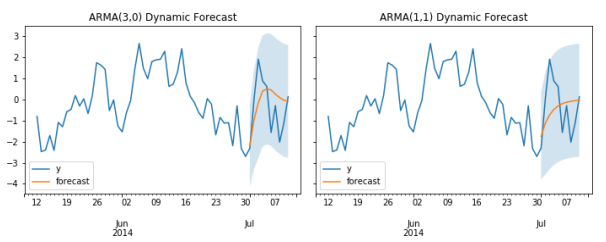

ACF and PACF
- ACF - Autocorrelation Function
- PACF - Partial autocorrelation function

What is the ACF: correlation of the time series, with the same time series offset (deslocado) by one step
- lag-1 autocorrelation → corr($y_{t}$ , $y_{t-1}$)
- lag-2 autocorrelation → corr($y_{t}$ , $y_{t-2}$ )
- ...
- lag-n autocorrelation → corr($y_{t}$ , $y_{t-n}$)

The bars that are inside the shade region, are not statistically significant

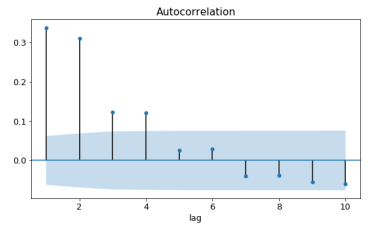

What is the PACF: is the correlation between a time series and the lag version of itself after we subtract the effect of correlation at smaller lags

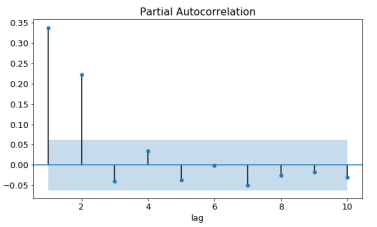

Using ACF and PACF to choose model order
- Compare both results to deduce the model order

AR(p) model (ACF tails off and PACF cuts off after lag p)

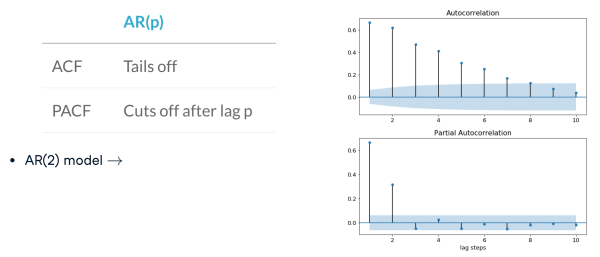

MA(q) model: ACF cuts off after lag q and PACF tails off

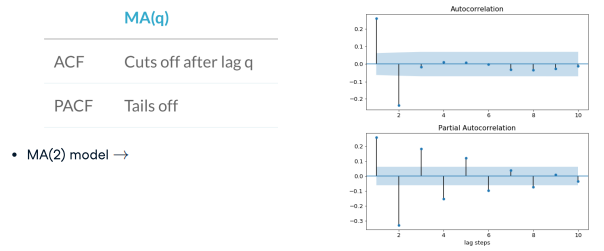

ARMA(p,q) model: ACF and PACF tails off. Can not deduce the order from the plot

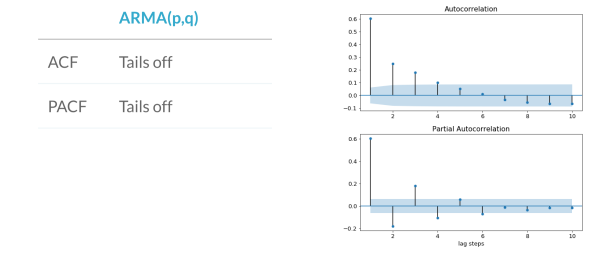

In general

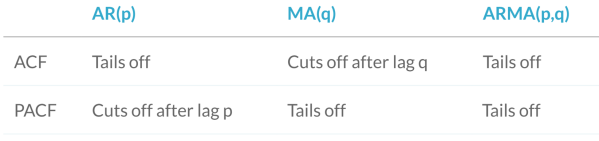

Implementation in Python

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(df, lags=10, zero=False, ax=ax1) #number of lags we want to see. zero = False simplify the plot
# Make PACF plot
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

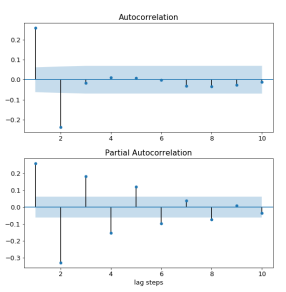

Over/under differencing and ACF and PACF

Data not stationary: needs to be differentiated

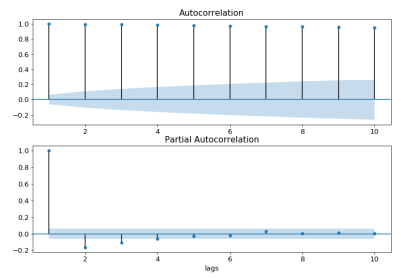

Taking the difference too many times:

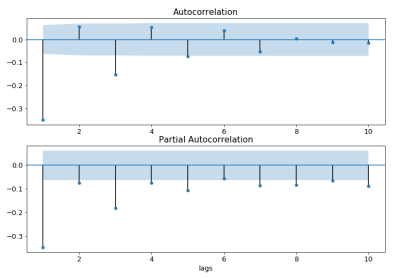

In [ ]:
#Example

# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

#MA(3) model: Perfect! The ACF cuts off after 3 lags and the PACF tails off.

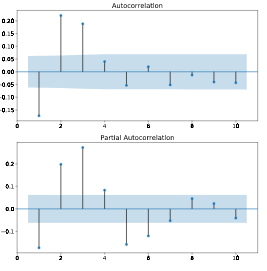

In [ ]:
#Example
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

#AR(1) model

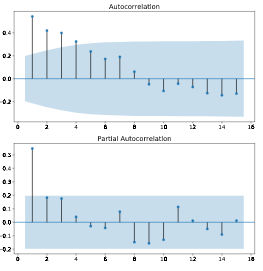

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = SARIMAX(earthquake, order = (1,0,0))

# Train model
results = model.fit()

### Intro to AIC and BIC

AIC - Akaike information criterion (how good a model is)
- Lower AIC indicates a better model
- AIC likes to choose simple models with lower order (penalize models with lots of parameters - helps not overfitting)

BIC - Bayesian information criterion
- Very similar to AIC
- Lower BIC indicates a better model
- BIC likes to choose simple models with lower order

AIC vs BIC (how they penalize model complexity - BIC penalizes more)
- BIC favors simpler models than AIC
- AIC is better at choosing predictive models
- BIC is beer at choosing good explanatory model

AIC and BIC in statsmodels

In [ ]:
# Create model
model = SARIMAX(df, order=(1,0,1))
# Fit model
results = model.fit()
# Print fit summary
print(results.summary())

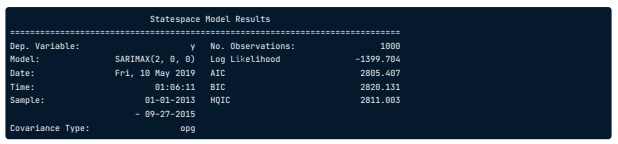

In [ ]:
# Create model
model = SARIMAX(df, order=(1,0,1))
# Fit model
results = model.fit()
# Print AIC and BIC
print('AIC:', results.aic)
print('BIC:', results.bic)

#Result
#AIC: 2806.36
#BIC: 2821.09

Searching over AIC and BIC

In [ ]:
# Loop over AR order
for p in range(3):
# Loop over MA order
    for q in range(3):
    # Fit model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        # print the model order and the AIC/BIC values
        print(p, q, results.aic, results.bic)

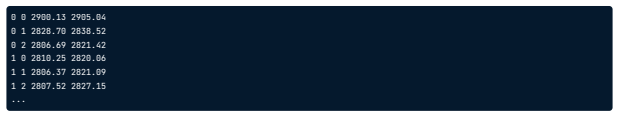

In [ ]:
order_aic_bic =[]
# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(3):
        # Fit model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
        # Make DataFrame of model order and AIC/BIC scores
        order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])

Searching over AIC and BIC

In [ ]:
# Sort by AIC
print(order_df.sort_values('aic'))

# Sort by BIC
print(order_df.sort_values('bic'))

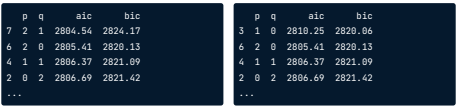

Non-stationary model orders

In [ ]:
# Fit model
model = SARIMAX(df, order=(2,0,1))
results = model.fit()

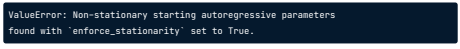

When certain orders don't work

Old code

In [ ]:
# Loop over AR order
for p in range(3):
# Loop over MA order
    for q in range(3):
        # Fit model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        # Print the model order and the AIC/BIC values
        print(p, q, results.aic, results.bic)

New code

In [ ]:
# Loop over AR order
for p in range(3):
# Loop over MA order
    for q in range(3):
        try:
            # Fit model
            model = SARIMAX(df, order=(p,0,q))
            results = model.fit()
            
            # Print the model order and the AIC/BIC values
            print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

In [ ]:
#Example
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic,results.bic))

In [ ]:
#Example
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=["p","q","AIC","BIC"])

# Print order_df in order of increasing AIC
print(order_df.sort_values("AIC"))

# Print order_df in order of increasing BIC
print(order_df.sort_values("BIC"))

In [ ]:
#Example
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order = (p, 0, q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

### Model diagnostics

Introduction to model diagnostics
- How good is the final model?

Residuals
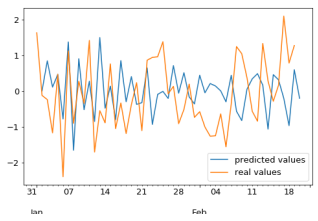

In [ ]:
# Fit model
model = SARIMAX(df, order=(p,d,q))
results = model.fit()
# Assign residuals to variable
residuals = results.resid #stored as a pandas series

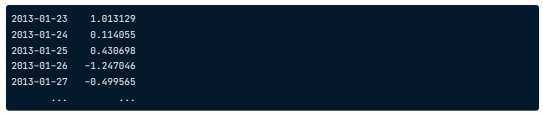

Mean absolute error
- How far our the predictions from the real values?
- Calculate the mean of the absolute residuals

In [ ]:
mae = np.mean(np.abs(residuals))

Plot diagnostics
- If the model fits well the residuals will be white Gaussian noise (centered on zero)

In [ ]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

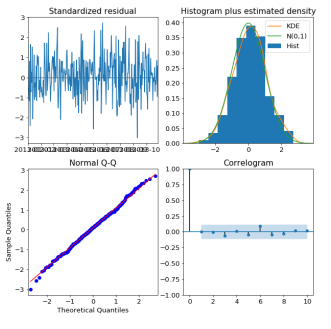

Residuals plot (one step ahead standardized residuals)
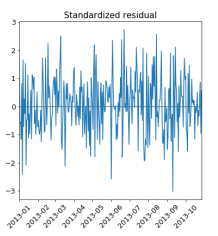

Residuals plot (plot on the right has a pattern)
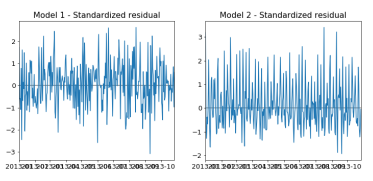

Histogram plus estimated density (residuals distribution, kde is the smooth distribution, while the green line is a normal distribution. two lines should be almost the same)
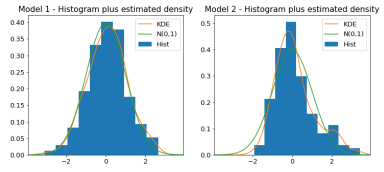

Normal Q-Q how they compare to a normal distribution. if it is a normal distribution, they should lie along the red line)
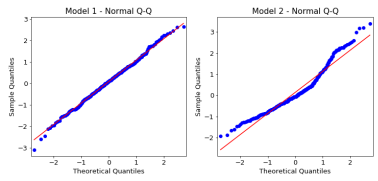

Correlogram (ACF plot)
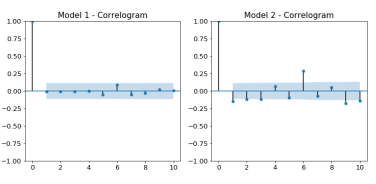

Summary statistics

In [ ]:
print(results.summary())

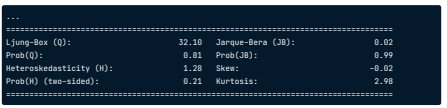

- Prob(Q) - p-value for null hypothesis that residuals are uncorrelated
- Prob(JB) - p-value for null hypothesis that residuals are normal

If it is less than 0.05, we can reject the hypothesis (the results above are what we want)

In [ ]:
#Example
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

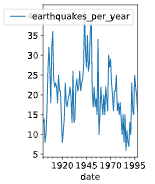

In [ ]:
#Example 2

# Create and fit model
model1 = SARIMAX(df, order = (3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

In [ ]:
#Example

# Create and fit model
model = SARIMAX(df, order=(1,1,1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

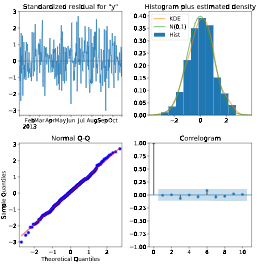

### Box-Jenkins method

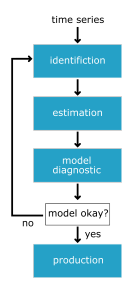

The Box-Jenkins method (kind of a checklist)
- From raw data → production model
    - identication
    - estimation
    - model diagnostics

Identification
- Is the time series stationary?
- What differencing will make it stationary?
- What transforms will make it stationary? (log)
- What values of p and q are most promising?

Identification tools
- Plot the time series
    - df.plot()
- Use augmented Dicky-Fuller test
    - adfuller()
- Use transforms and/or dierencing
    - df.diff() , np.log() , np.sqrt()
- Plot ACF/PACF - identify promissing model order
    - plot_acf() , plot_pacf()

Estimation
- Use the data to train the model coefficients
- Done for us using model.fit()
- Choose between models using AIC and BIC
    - results.aic , results.bic

Model diagnostics
- Are the residuals uncorrelated
- Are residuals normally distributed
    - results.plot_diagnostics()
    - results.summary()

Decision
- Is the model ok?

If not: Repeat
- We go through the process again with more information
- Find a beer model

If yes: Production
- Ready to make forecasts
- results.get_forecast()

In [ ]:
#Example
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings)

# Print test statistic
print(result)

# Print p-value
result[1]

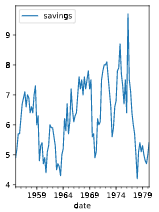

In [ ]:
#Example
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags = 10, zero = False, ax = ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags = 10, zero = False, ax = ax2)

plt.show()

In [ ]:
#Example
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p,0,q), trend="c")
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

In [ ]:
# Create and fit model
model = SARIMAX(savings, order = (1,0,2), trend = "c")
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary()) 

#obs: there is an outlier in the data

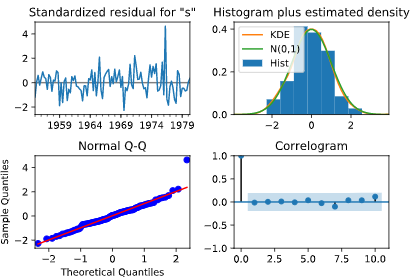

## Seasonal ARIMA Models

### Seasonal time series

Seasonal data
- Has predictable and repeated patterns
- Repeats after any amount of time (year, week, day etc)

Seasonal decomposition (first image is the time series, the second, the trend, the third, the seasonal component, and the fourth, the residual)
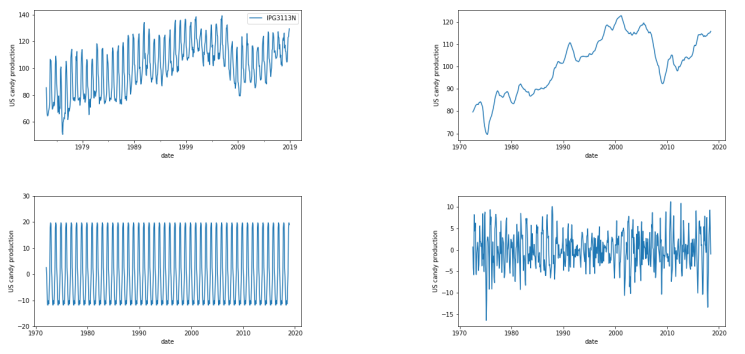

time series = trend + seasonal + residual

Seasonal decomposition using statsmodels

In [ ]:
# Import
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose data
decomp_results = seasonal_decompose(df['IPG3113N'], period=12) #number of data points in each repeated cycle. in our case is 12 steps
type(decomp_results)

#output: statsmodels.tsa.seasonal.DecomposeResult

In [ ]:
# Plot decomposed data
decomp_results.plot() #plot the three components
plt.show()

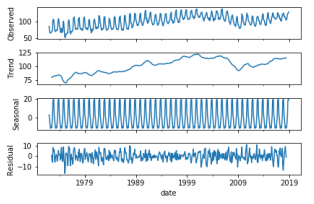

Finding seasonal period using ACF

ACF shows a periodic correlation pattern. find the peak, greater than 1. there 12 lags, so it repeats at every 12 steps

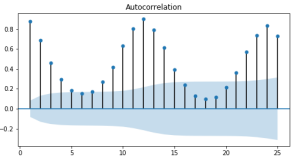

It is hard to tell by eye if it is seasonal or not

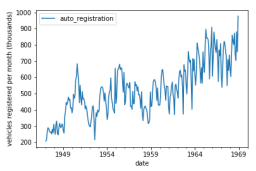

Detrending time series

In [ ]:
# Subtract long rolling average over N steps
df = df - df.rolling(N).mean() #N = window size
# Drop NaN values
df = df.dropna()

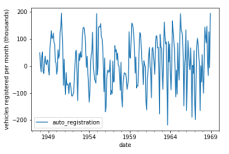

Identifying seasonal data using ACF

In [ ]:
# Create figure
fig, ax = plt.subplots(1,1, figsize=(8,4))
# Plot ACF
plot_acf(df.dropna(), ax=ax, lags=25, zero=False)
plt.show()

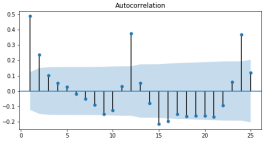

ARIMA models and seasonal data

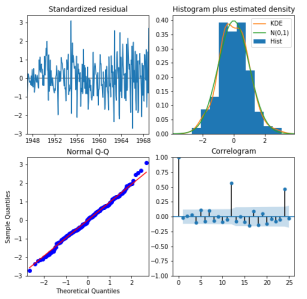

In [ ]:
#Example
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production.pounds_per_cow, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

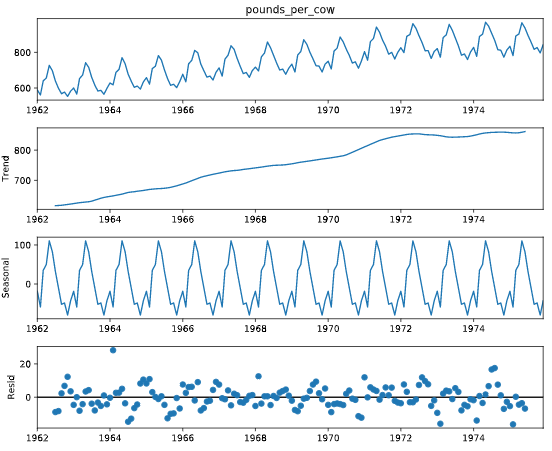

In [ ]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water.water_consumers, lags = 25, zero=False,  ax=ax1)

# Show figure
plt.show()

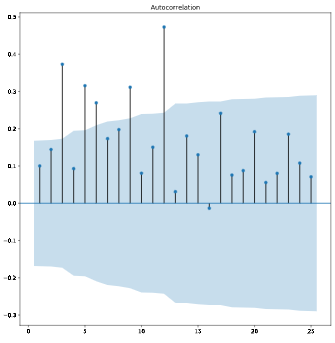

In [ ]:
#Example

# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show() #seasonal component of 12 days

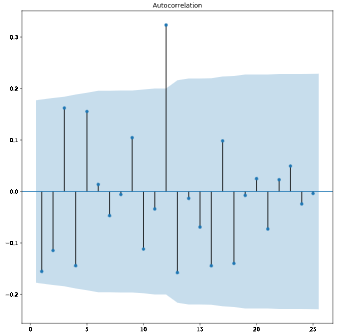

### SARIMA models

The SARIMA model


Seasonal ARIMA = SARIMA (sarima is like fitting two arimas, at once, one for the non seasonal, and other one for the seasonal)
- Non-seasonal orders
    - p: autoregressive order
    - d: differencing order
    - q: moving average order
SARIMA(p,d,q)(P,D,Q)$_{S}$
- Seasonal Orders
    - P: seasonal autoregressive order
    - D: seasonal differencing order
    - Q: seasonal moving average order
    - S: number of time steps per cycle

ARIMA(2,0,1) model :


SARIMA(0,0,0)(2,0,1)$_{t}$ model:


Fitting a SARIMA model (several orders to find)

In [ ]:
# Imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Instantiate model
model = SARIMAX(df, order=(p,d,q), seasonal_order=(P,D,Q,S))
# Fit model
results = model.fit()

Seasonal differencing (to make it stationary)
- Subtract the time series value of one season (cycle) ago


In [ ]:
# Take the seasonal difference
df_diff = df.diff(S)

Differencing for SARIMA models

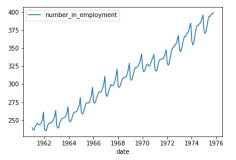
Time series - take the normal diff for this case

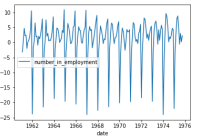
First difference of time series - take the seasonal difference for this one

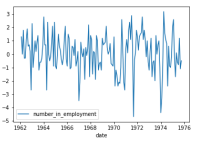
First difference and first seasonal difference of time series

Then, we should find the model orders

Finding p and q - plot pcf and dcf

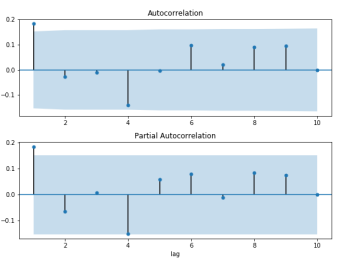

Finding P and Q - plot acf and pacf at multiple seasonal steps (for the seasonal orders). Use the same table

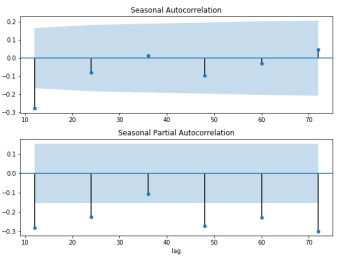

Plotting seasonal ACF and PACF

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot seasonal ACF
plot_acf(df_diff, lags=[12,24,36,48,60,72], ax=ax1) #plots specific lags only
# Plot seasonal PACF
plot_pacf(df_diff, lags=[12,24,36,48,60,72], ax=ax2)
plt.show()

In [ ]:
#Example
# Create a SARIMAX model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

# Create a SARIMAX model
model = SARIMAX(df2, order = (2,1,1), seasonal_order = (1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

# Create a SARIMAX model
model = SARIMAX (df3, order = (1,1,0), seasonal_order = (0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

In [ ]:
#Example
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff(1).diff(12).dropna()

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags = 11, zero = False, ax = ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags = 11, zero = False, ax = ax2)

plt.show()


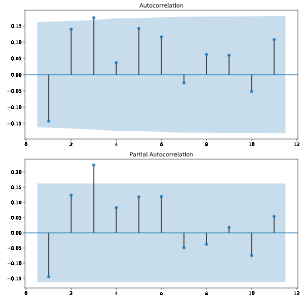

In [ ]:
#Example (continuation)

# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags = lags, ax = ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags = lags, ax = ax2)

plt.show()

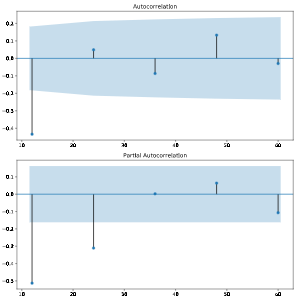

In [ ]:
#appropriate model: SARIMAX(0,1,0)(0,1,1)12 - my question: the diff argument is related to the difference we take?
#Great! The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these.
#The Seasonal ACF and PACF look like an MA(1) model. We select the model that combines both of these.

In [ ]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps = 25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast (steps = 25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

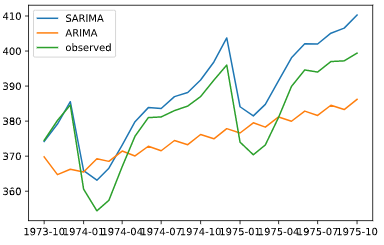

### Automation and saving 

Searching over model orders

https://alkaline-ml.com/pmdarima/about.html

In [ ]:
import pmdarima as pm #looks over several one to find the best
results = pm.auto_arima(df)

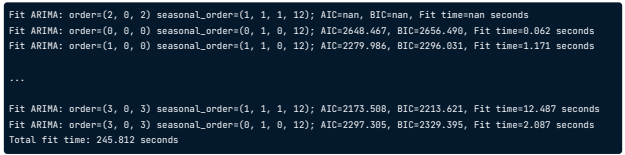

pmdarima results - the best one found

In [ ]:
print(results.summary())

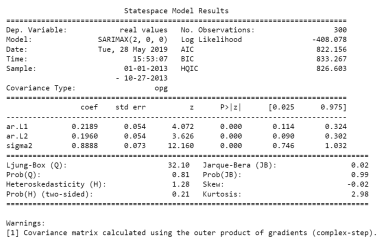

In [ ]:
results.plot_diagnostics()

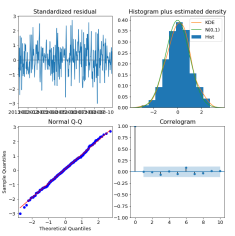

Non-seasonal search parameters (we will focus on the main ones)

In [ ]:
results = pm.auto_arima(df, # data
                        d=0, # non-seasonal difference order
                        start_p=1, # initial guess for p
                        start_q=1, # initial guess for q
                        max_p=3, # max value of p to test
                        max_q=3, # max value of q to test
                       )
#hps://www.alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

Seasonal search parameters - set the seasonal parameter to true

In [ ]:
results = pm.auto_arima(df, # data
                        ... , # non-seasonal arguments
                        seasonal=True, # is the time series seasonal
                        m=7, # the seasonal period
                        D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=2, # max value of P to test
                        max_Q=2, # max value of Q to test
                       )

Other parameters - not orders

In [ ]:
results = pm.auto_arima(df, # data... , # model order parameters
                        information_criterion='aic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True, # apply intelligent order search for the guess
                       )

Saving and loading model objects - use joblib

In [ ]:
# Import
import joblib

# Select a filepath
filepath ='localpath/great_model.pkl'

# Save model to filepath
joblib.dump(model_results_object, filepath)

In [ ]:
# Select a filepath
filepath ='localpath/great_model.pkl'

# Load model object from filepath
model_results_object = joblib.load(filepath)

Updating model

In [ ]:
# Add new observations and update parameters
model_results_object.update(df_new) #will use the same parameters. if you have several new ones, use another model

Update comparison

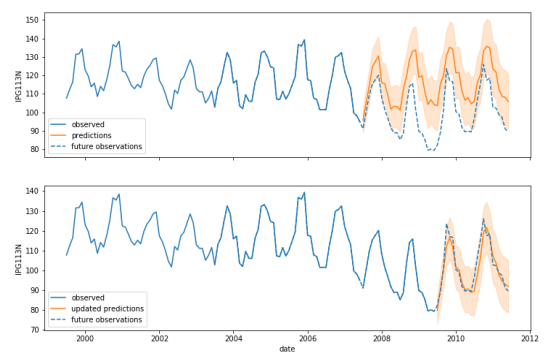

In [ ]:
#Example
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False,
                      d=1,
                      trend="c",
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

#Fit a SARIMAX(p,1,q)(P,1,Q) model to the data setting start_p, start_q, max_p, max_q, max_P and max_Q to 1.
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

In [ ]:
#Example
# Import joblib
import joblib

# Set model name
filename = "candy_model.pkl"

# Pickle it
joblib.dump(model,filename)

# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
loaded_model.update(df_new)

### SARIMA and Box-Jenkins

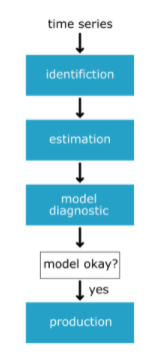

Box-Jenkins with seasonal data - will change only the identification step
- Determine if time series is seasonal
- Find seasonal period
- Find transforms to make data stationary
    - Seasonal and non-seasonal differencing
    - Other transforms

Mixed differencing
- D should be 0 or 1
- d + D should be 0-2

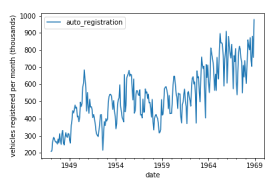

Weak vs strong seasonality
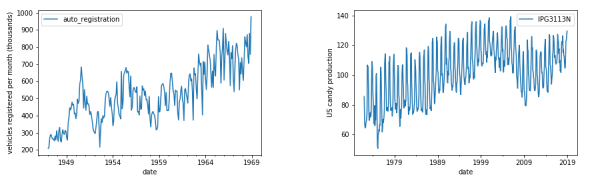

Figure 1:
- Weak seasonal pattern
- Use seasonal differencing if necessary

Figure 2:
- Strong seasonal paern
- Always use seasonal dierencing

Additive vs multiplicative seasonality

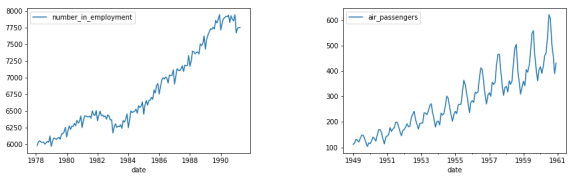

FIgure 1:
- Additive series = trend + season
- Proceed as usual with differencing

Figure 2:
- multiplicative series = trend x season
- Apply log transform rst - np.log

Multiplicative to additive seasonality
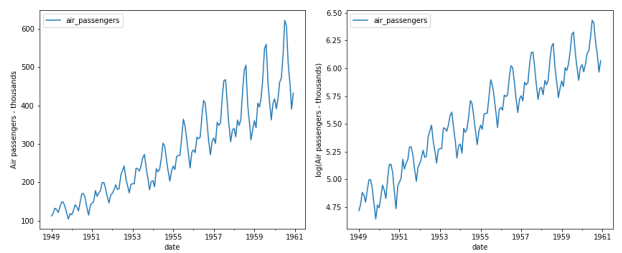

In [ ]:
#Example
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
                trend="c")
# Fit model
results = model.fit()

results.summary()

# Plot common diagnostics
results.plot_diagnostics()
plt.show()

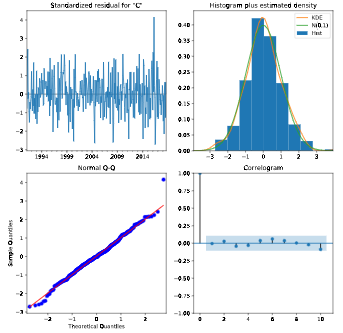

In [ ]:
# Create forecast object
forecast_object = results.get_forecast(steps = 136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int["lower CO2_ppm"], conf_int["upper CO2_ppm"], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

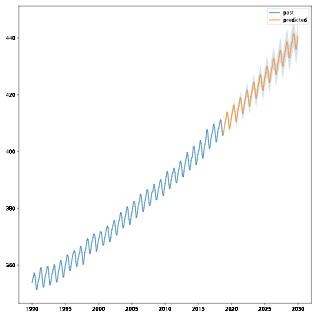

### Congratulations!

THe SARIMAX model
- S - seasonal
- AR - autoregressive
- I - integrated
- MA - moving average
- X - exogenous

Time series modeling framework (box jankins method)
- Test for stationarity and seasonality
- Find promising model orders
- Fit models and narrow selection with AIC/BIC
- Perform model diagnostics tests
- Make forecasts
- Save and update models

Further steps
- Fit data created using arma_generate_sample()
- Tackle real world data! Either your own or examples from statsmodels (https://www.statsmodels.org/stable/datasets/index.html)
- More time series courses here